In [252]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')


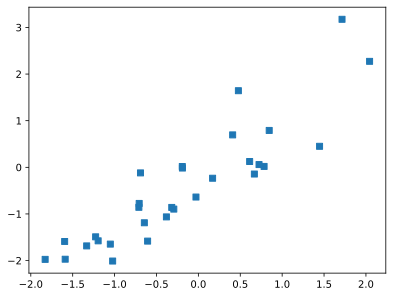

In [253]:
N=30
x=torch.randn(N,1)
y=x+torch.randn(N,1)/2

plt.plot(x,y,'s')
plt.show()

In [254]:
#building the model
ANNreg=nn.Sequential(
    nn.Linear(1,1),
    nn.ReLU(),
    nn.Linear(1,1)
    )
ANNreg

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [255]:
learningRate=0.05
lossfun=nn.MSELoss()
optimizer=torch.optim.SGD(ANNreg.parameters(),lr=learningRate)

In [256]:
#training the model
numepochs=500
losses=torch.zeros(numepochs)

#train the model
for epochi in range(numepochs):
    #forward pass
    yHat=ANNreg(x) 
    #compute loss
    loss=lossfun(yHat,y)
    losses[epochi]=loss
    #backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

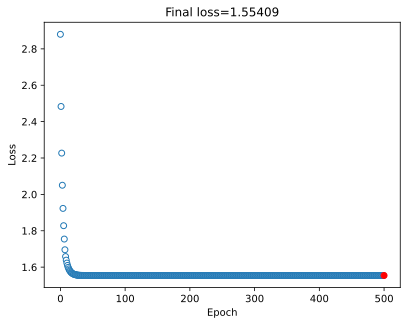

In [257]:
predictions = ANNreg(x)
testloss = (predictions - y).pow(2).mean()

plt.plot(losses.detach(), 'o', markerfacecolor='w', linewidth=.1)
plt.plot(numepochs,testloss.detach(),'ro')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Final loss=%g' % testloss.item())
plt.show()

In [258]:
testloss

tensor(1.5541, grad_fn=<MeanBackward0>)

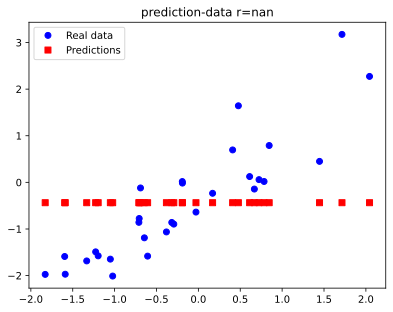

In [259]:
# plot the data
plt.plot(x,y,'bo',label='Real data')
plt.plot(x,predictions.detach(),'rs',label='Predictions')
plt.title(f'prediction-data r={np.corrcoef(y.T,predictions.detach().T)[0,1]:.2f}')
plt.legend()
plt.show()

Put the original code (that is, N=30 and /2 noise) into a function or a for-loop and repeat the training 100 times (each time using a fresh model instance).
Then count the number of times the model had a loss>.25.

In [260]:
# function to train model once and return final loss
def train_once(N=30, numepochs=500):
    # generate synthetic data: y = x + noise
    x = torch.randn(N,1)
    y = x + torch.randn(N,1)/2

    # define model (fresh instance each run)
    ANNreg = nn.Sequential(
        nn.Linear(1,1),  # input -> hidden
        nn.ReLU(),
        nn.Linear(1,1)   # hidden -> output
    )

    # loss and optimizer
    lossfun = nn.MSELoss()
    optimizer = optim.SGD(ANNreg.parameters(), lr=0.01)

    # training loop
    for epochi in range(numepochs):
        # forward
        yHat = ANNreg(x)
        loss = lossfun(yHat,y)

        # backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # compute final test loss
    predictions = ANNreg(x)
    testloss = ((predictions - y)**2).mean()
    return testloss.item()

# run multiple times
num_trials = 100
threshold = 0.25
count_above = 0

for i in range(num_trials):
    final_loss = train_once()
    if final_loss > threshold:
        count_above += 1

print(f"Out of {num_trials} runs, {count_above} had final loss > {threshold}")

Out of 100 runs, 79 had final loss > 0.25
